In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib as mpl
import os
import numpy as np
from scipy.optimize import leastsq

In [2]:
file = "54026/54026_CatBoost1.xlsx";station_catboost1 = pd.read_excel(file,header=None,names=["PM","ML"])
file = "54026/54026_GRNN1.xlsx";station_grnn1 = pd.read_excel(file,header=None,names=["PM","ML"])
file = "54026/54026_RF1.xlsx";station_rf1 = pd.read_excel(file,header=None,names=["PM","ML"])
#
file = "54026/54026_CatBoost3.xlsx";station_catboost3 = pd.read_excel(file,header=None,names=["PM","ML"])
file = "54026/54026_GRNN3.xlsx";station_grnn3 = pd.read_excel(file,header=None,names=["PM","ML"])
file = "54026/54026_RF3.xlsx";station_rf3 = pd.read_excel(file,header=None,names=["PM","ML"])
#
file = "54026/54026_CatBoost7.xlsx";station_catboost7 = pd.read_excel(file,header=None,names=["PM","ML"])
file = "54026/54026_GRNN7.xlsx";station_grnn7 = pd.read_excel(file,header=None,names=["PM","ML"])
file = "54026/54026_RF7.xlsx";station_rf7 = pd.read_excel(file,header=None,names=["PM","ML"])
#
file = "54026/54026_CatBoost8.xlsx";station_catboost8 = pd.read_excel(file,header=None,names=["PM","ML"])
file = "54026/54026_GRNN8.xlsx";station_grnn8 = pd.read_excel(file,header=None,names=["PM","ML"])
file = "54026/54026_RF8.xlsx";station_rf8 = pd.read_excel(file,header=None,names=["PM","ML"])


In [3]:
x_catboost1 = station_catboost1["PM"];y_catboost1 = station_catboost1["ML"]
x_grnn1 = station_grnn1["PM"];y_grnn1 = station_grnn1["ML"]
x_rf1 = station_rf1["PM"];y_rf1 = station_rf1["ML"]
#
x_catboost3 = station_catboost3["PM"];y_catboost3 = station_catboost3["ML"]
x_grnn3 = station_grnn3["PM"];y_grnn3 = station_grnn3["ML"]
x_rf3 = station_rf3["PM"];y_rf3 = station_rf3["ML"]
#
x_catboost7 = station_catboost7["PM"];y_catboost7 = station_catboost7["ML"]
x_grnn7 = station_grnn7["PM"];y_grnn7 = station_grnn7["ML"]
x_rf7 = station_rf7["PM"];y_rf7 = station_rf7["ML"]
#
x_catboost8 = station_catboost8["PM"];y_catboost8 = station_catboost8["ML"]
x_grnn8 = station_grnn8["PM"];y_grnn8 = station_grnn8["ML"]
x_rf8 = station_rf8["PM"];y_rf8 = station_rf8["ML"]

曲线拟合

In [4]:
 #计算 r^2
def R2(y_test, y_true):
    return 1 - ((y_test - y_true)**2).sum() / ((y_true - y_true.mean())**2).sum()
    x_=np.arange(x.min(),x.max()+1,0.1)
    
def my_fit(x,y,n):
    #拟合曲线方程,并返回拟合方程 p, R2
    fit_coef = np.polyfit(x,y,n)
    p = np.poly1d(fit_coef) 
    r2 = R2(p(x),y)
    return p,r2

In [5]:
# p_g3,r_g3 = my_fit(x_grnn3,y_grnn3,1)
station_grnn3.head()
fit_coef = np.polyfit(station_grnn3["PM"],station_grnn3["ML"],1)

In [6]:


#方程拟合,组合一
p_c1,r_c1 = my_fit(x_catboost1,y_catboost1,1)
p_g1,r_g1 = my_fit(x_grnn1,y_grnn1,1)
p_r1,r_r1 = my_fit(x_rf1,y_rf1,1)
#
p_c3,r_c3 = my_fit(x_catboost3,y_catboost3,1)
p_g3,r_g3 = my_fit(x_grnn3,y_grnn3,1)
p_r3,r_r3 = my_fit(x_rf3,y_rf3,1)
#
p_c7,r_c7 = my_fit(x_catboost7,y_catboost7,1)
p_g7,r_g7 = my_fit(x_grnn7,y_grnn7,1)
p_r7,r_r7 = my_fit(x_rf7,y_rf7,1)
#
p_c8,r_c8 = my_fit(x_catboost8,y_catboost8,1)
p_g8,r_g8 = my_fit(x_grnn8,y_grnn8,1)
p_r8,r_r8 = my_fit(x_rf8,y_rf8,1)

In [7]:
# %matplotlib widget
%matplotlib inline

D:\Miniconda3\lib\site-packages\ipykernel_launcher.py:82: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


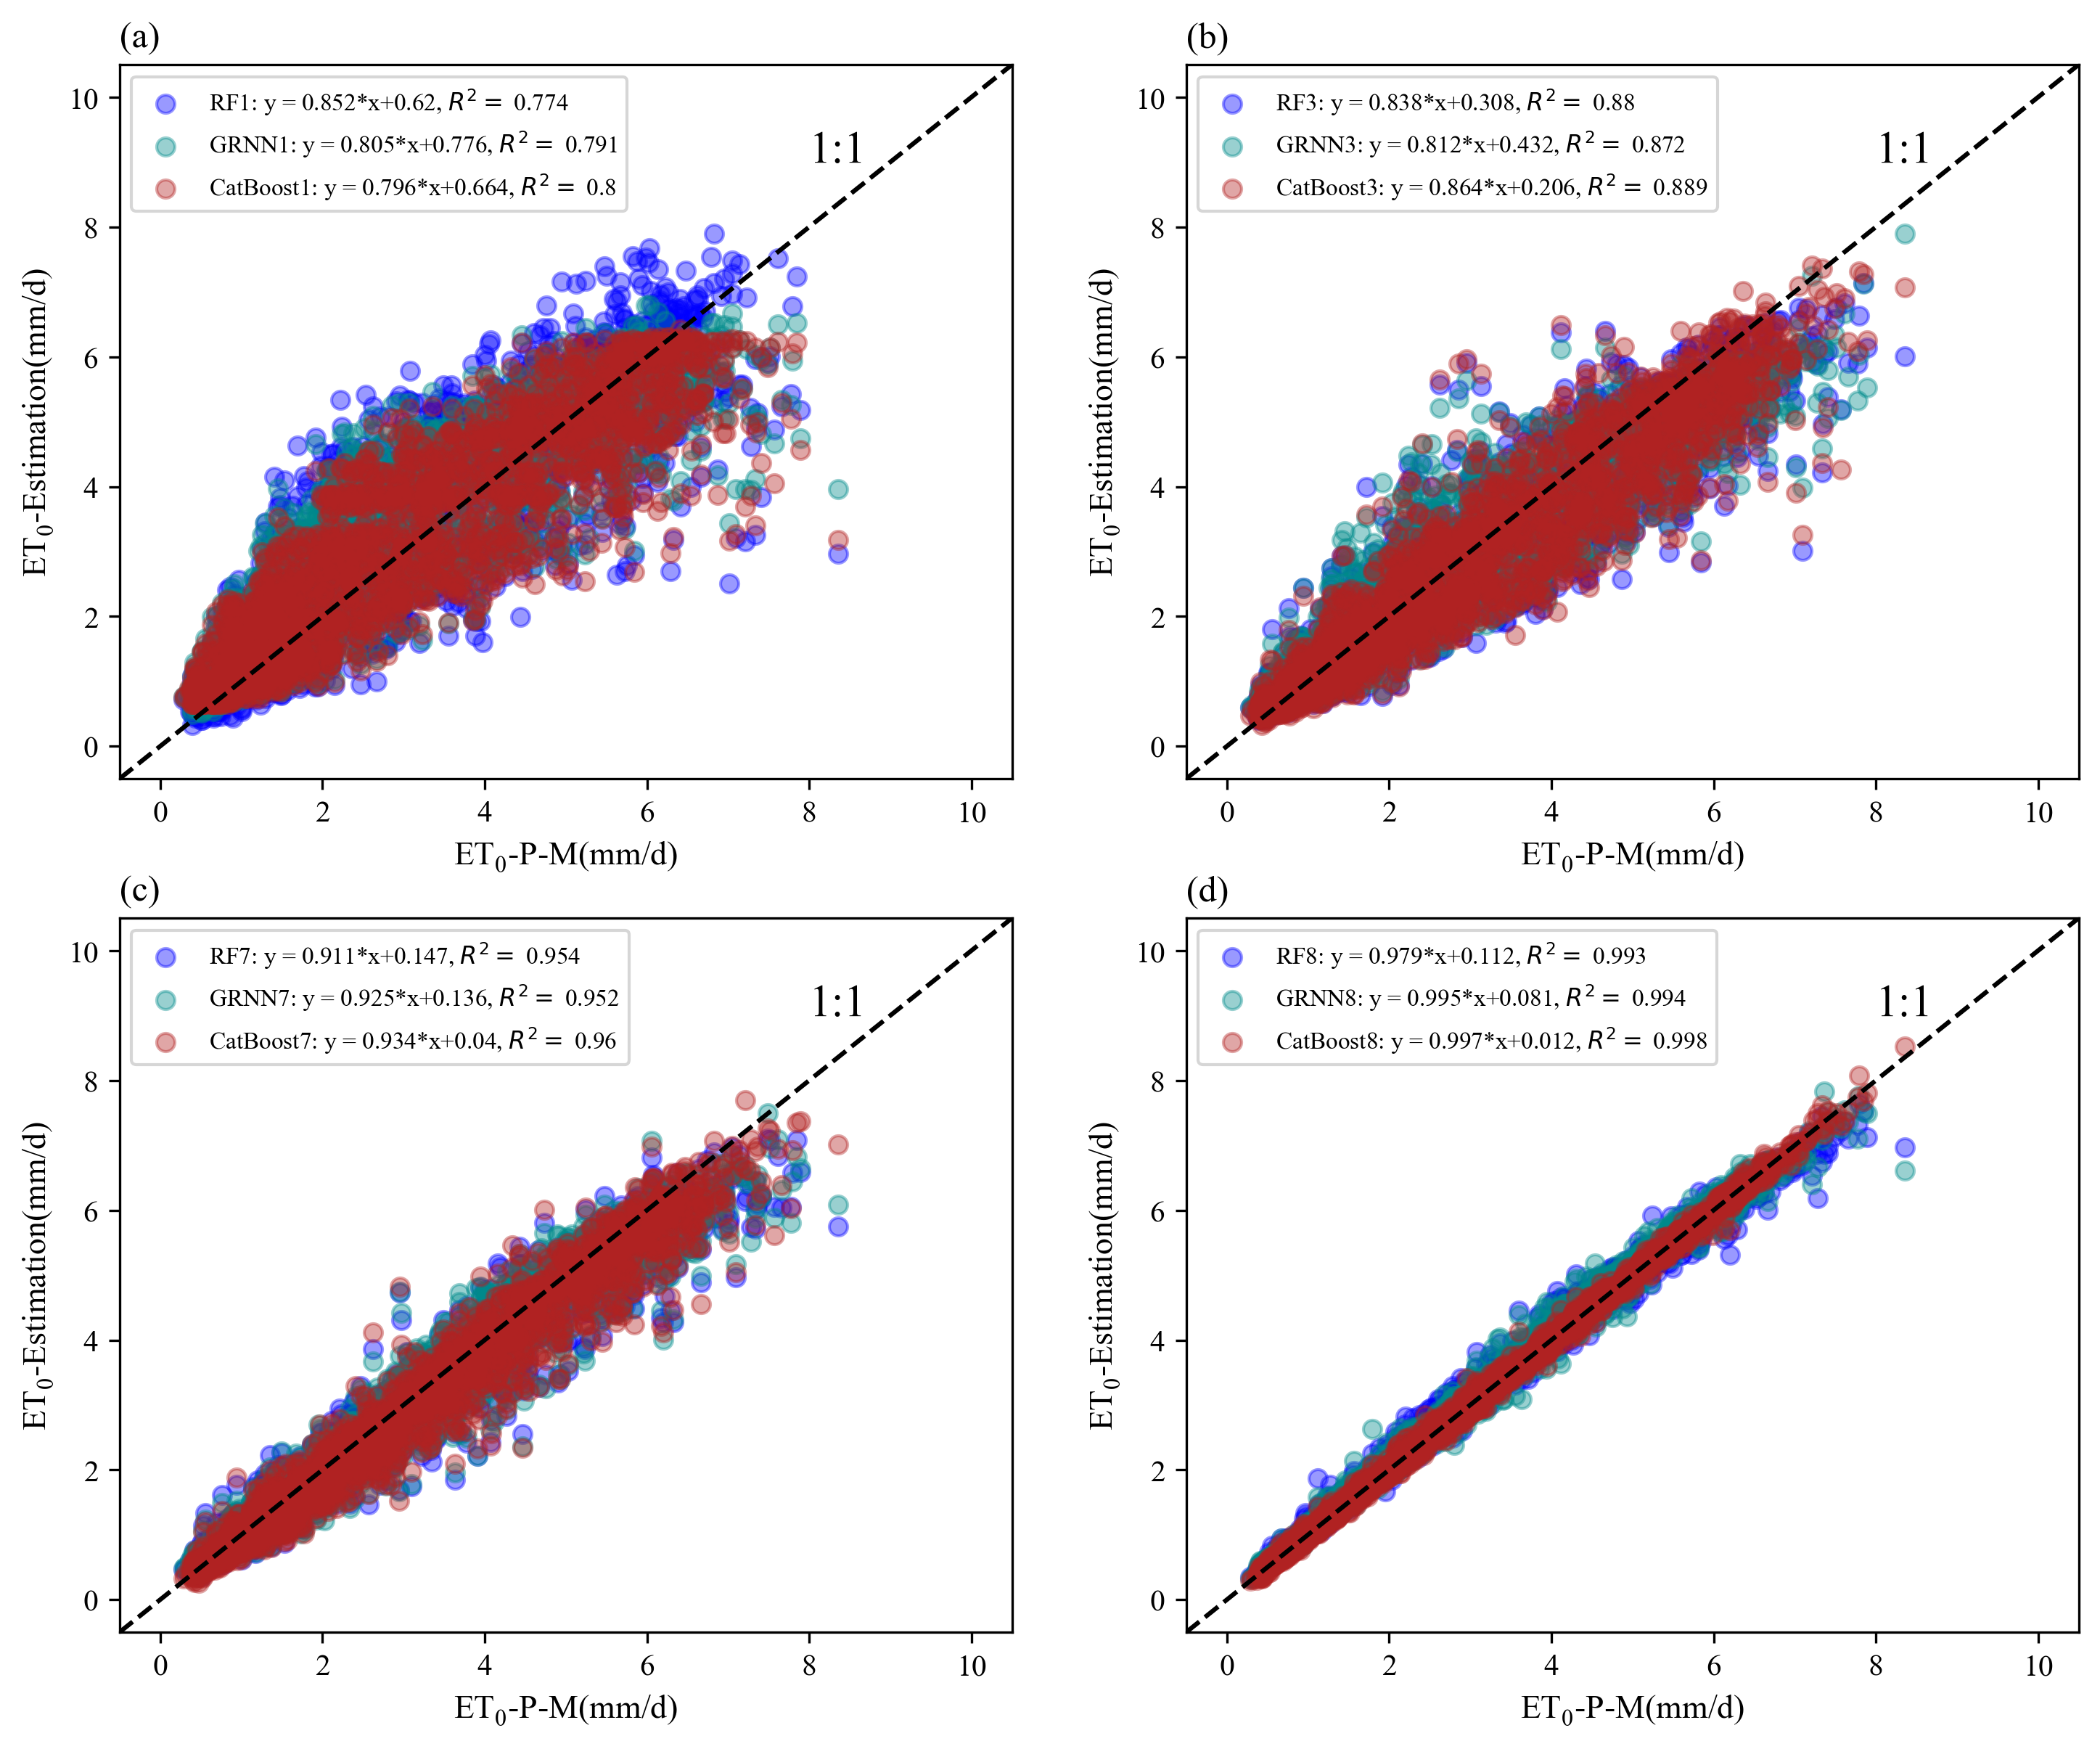

In [8]:
###绘制拟合曲线
# ax1.plot(x_catboost,p_c1(x_catboost),color="black",linewidth=0.5)
#设置字体
mpl.rcParams["font.sans-serif"]=["Times New Roman"]

#绘图
fig = plt.figure(figsize=(10,8),dpi=300)
ax1 = fig.add_axes([0.07,0.07,0.41,0.41])
ax2 = fig.add_axes([0.56,0.07,0.41,0.41])
ax3 = fig.add_axes([0.07,0.56,0.41,0.41])
ax4 = fig.add_axes([0.56,0.56,0.41,0.41])

ax3.set_title("(a)",loc="left")
ax4.set_title("(b)",loc="left")
ax1.set_title("(c)",loc="left")
ax2.set_title("(d)",loc="left")
####图a
label_text3 = str("y = ")+str(round(p_r1[1],3))+"*x+"+str(round(p_r1[0],3))+', '+r'$R^{2}=$ '+str(round(r_r1,3))
ax3.scatter(x_rf1,y_rf1,color="b",marker="o",alpha=.4,label = u'RF1: '+label_text3)   
label_text2 = str("y = ")+str(round(p_g1[1],3))+"*x+"+str(round(p_g1[0],3))+', '+r'$R^{2}=$ '+str(round(r_g1,3))
ax3.scatter(x_grnn1,y_grnn1,color="darkcyan",marker="o",alpha=.4,label = u'GRNN1: '+label_text2) 
label_text1 = str("y = ")+str(round(p_c1[1],3))+"*x+"+str(round(p_c1[0],3))+', '+r'$R^{2}=$ '+str(round(r_c1,3))
ax3.scatter(x_catboost1,y_catboost1,color="firebrick",marker="o",alpha=.4,label = u'CatBoost1: '+label_text1)   
#绘制1:1
ax3.plot([-0.5,10.5],[-0.5,10.5],linestyle="--",color = "black")
ax3.set_xlabel(r"E$\mathregular{T_0}$-P-M(mm/d)",fontsize=11)
ax3.set_ylabel(r"E$\mathregular{T_0}$-Estimation(mm/d)",fontsize=11)
ax3.set_ylim(-0.5,10.5)
ax3.set_xlim(-0.5,10.5)
ax3.legend(loc="upper left",fontsize=8)
# ax3.set_title("station:51346_1")
ax3.text(8, 9, "1:1", color="black",fontsize=15)
####图b
label_text3 = str("y = ")+str(round(p_r3[1],3))+"*x+"+str(round(p_r3[0],3))+', '+r'$R^{2}=$ '+str(round(r_r3,3))
ax4.scatter(x_rf3,y_rf3,color="b",marker="o",alpha=.4,label = u'RF3: '+label_text3)   
label_text2 = str("y = ")+str(round(p_g3[1],3))+"*x+"+str(round(p_g3[0],3))+', '+r'$R^{2}=$ '+str(round(r_g3,3))
ax4.scatter(x_grnn3,y_grnn3,color="darkcyan",marker="o",alpha=.4,label = u'GRNN3: '+label_text2) 
label_text1 = str("y = ")+str(round(p_c3[1],3))+"*x+"+str(round(p_c3[0],3))+', '+r'$R^{2}=$ '+str(round(r_c3,3))
ax4.scatter(x_catboost3,y_catboost3,color="firebrick",marker="o",alpha=.4,label = u'CatBoost3: '+label_text1)   
#绘制1:1
ax4.plot([-0.5,10.5],[-0.5,10.5],linestyle="--",color = "black")
ax4.set_xlabel(r"E$\mathregular{T_0}$-P-M(mm/d)",fontsize=11)
ax4.set_ylabel(r"E$\mathregular{T_0}$-Estimation(mm/d)",fontsize=11)
ax4.set_ylim(-0.5,10.5)
ax4.set_xlim(-0.5,10.5)
ax4.legend(loc="upper left",fontsize=8)
# ax4.set_title("station:51346_3")
ax4.text(8, 9, "1:1", color="black",fontsize=15)
####图c
label_text3 = str("y = ")+str(round(p_r7[1],3))+"*x+"+str(round(p_r7[0],3))+', '+r'$R^{2}=$ '+str(round(r_r7,3))
ax1.scatter(x_rf7,y_rf7,color="b",marker="o",alpha=.4,label = u'RF7: '+label_text3)   
label_text2 = str("y = ")+str(round(p_g7[1],3))+"*x+"+str(round(p_g7[0],3))+', '+r'$R^{2}=$ '+str(round(r_g7,3))
ax1.scatter(x_grnn7,y_grnn7,color="darkcyan",marker="o",alpha=.4,label = u'GRNN7: '+label_text2) 
label_text1 = str("y = ")+str(round(p_c7[1],3))+"*x+"+str(round(p_c7[0],3))+', '+r'$R^{2}=$ '+str(round(r_c7,3))
ax1.scatter(x_catboost7,y_catboost7,color="firebrick",marker="o",alpha=.4,label = u'CatBoost7: '+label_text1)   
#绘制1:1
ax1.plot([-0.5,10.5],[-0.5,10.5],linestyle="--",color = "black")
ax1.set_xlabel(r"E$\mathregular{T_0}$-P-M(mm/d)",fontsize=11)
ax1.set_ylabel(r"E$\mathregular{T_0}$-Estimation(mm/d)",fontsize=11)
ax1.set_ylim(-0.5,10.5)
ax1.set_xlim(-0.5,10.5)
ax1.legend(loc="upper left",fontsize=8)
# ax1.set_title("station:51346_7")
ax1.text(8, 9, "1:1", color="black",fontsize=15)
#####图d
label_text3 = str("y = ")+str(round(p_r8[1],3))+"*x+"+str(round(p_r8[0],3))+', '+r'$R^{2}=$ '+str(round(r_r8,3))
ax2.scatter(x_rf8,y_rf8,color="b",marker="o",alpha=.4,label = u'RF8: '+label_text3)   
label_text2 = str("y = ")+str(round(p_g8[1],3))+"*x+"+str(round(p_g8[0],3))+', '+r'$R^{2}=$ '+str(round(r_g8,3))
ax2.scatter(x_grnn8,y_grnn8,color="darkcyan",marker="o",alpha=.4,label = u'GRNN8: '+label_text2) 
label_text1 = str("y = ")+str(round(p_c8[1],3))+"*x+"+str(round(p_c8[0],3))+', '+r'$R^{2}=$ '+str(round(r_c8,3))
ax2.scatter(x_catboost8,y_catboost8,color="firebrick",marker="o",alpha=.4,label = u'CatBoost8: '+label_text1)   
#绘制1:1
ax2.plot([-0.5,10.5],[-0.5,10.5],linestyle="--",color = "black")
ax2.set_xlabel(r"E$\mathregular{T_0}$-P-M(mm/d)",fontsize=11)
ax2.set_ylabel(r"E$\mathregular{T_0}$-Estimation(mm/d)",fontsize=11)
ax2.set_ylim(-0.5,10.5)
ax2.set_xlim(-0.5,10.5)
ax2.legend(loc="upper left",fontsize=8)
# ax2.set_title("station:51346_8")
ax2.text(8, 9, "1:1", color="black",fontsize=15)

plt.tight_layout()
plt.savefig("54026.pdf")
plt.show()